# Revisión (primera iteración)

Hola, Alen!

Mi nombre es David Esparza Jasso y estoy feliz por revisar tu proyecto el día de hoy.



Encontrarás mis comentarios abajo. - **por favor, no los muevas, modifiques o elimines**.


Puedes encontrar mis comentarios en cajas verdes, amarillas y rojas como éstas:

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcto. Todo se hizo correctamente!
</div>

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Necesita correcciones. La parte correspondiente requiere algunas correcciones. El trabajo no puede ser aprobado con comentarios rojos sin corregir.
</div>

Puedes contestarme usando este tipo de cajas:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
En celdas como éstas puedes dejarme tus comentarios
</div>

Recuerda que, si deseas dejarme un comentario en alguna parte del documento, sólo tienes que dar doble clic sobre la celda de arriba, copiar el código, pegarlo en una nueva celda y sustituir la frase "En celdas como éstas puedes dejarme tus comentarios" por tu propio comentario. Asegúrate sólamente que la celda donde vayas a incluir tu comentario esté en formato "Markdown".

<div class="alert alert-block alert-success">
<b>COMENTARIO GENERAL PRIMERA REVISIÓN</b> <a class="tocSkip"></a>

Felicidades, Alen! tu trabajo es correcto y estás aprobado! Es muy difícil que un estudiante apruebe un proyecto en estos niveles a la primera iteración, así que siéntete muy orgulloso! Sólo te dejo **1 comentario amarillo** para que por favor lo revises y te pueda ayudar en el futuro :)
    
Saludos!    

</div>

# Introduccion 

Este proyecto tiene como objetivo asistir a la compañía minera OilyGiant en la identificación del mejor lugar para establecer un nuevo pozo minero. Utilizaremos un modelo predictivo basado en regresión lineal para analizar la información disponible sobre múltiples reservas en tres regiones distintas.

Nuestra tarea consistirá en examinar los datos proporcionados y utilizar el modelo de regresión lineal para evaluar el potencial de ganancias y los riesgos asociados a cada pozo y región. Este análisis nos permitirá tomar decisiones fundamentadas sobre la ubicación más adecuada para la instalación del nuevo pozo minero.

Al aplicar la regresión lineal, podremos identificar las variables clave que influyen en la productividad y rentabilidad de los pozos. Además, podremos realizar predicciones sobre los posibles rendimientos y riesgos asociados a cada ubicación, lo que proporcionará a OilyGiant una visión sólida para optimizar sus operaciones mineras y maximizar sus ganancias.

Nuestro enfoque se basa en aprovechar la potencia del modelo predictivo de regresión lineal para brindar a OilyGiant información valiosa y respaldada por datos, lo que les permitirá tomar decisiones estratégicas informadas en relación con la selección del mejor lugar para el nuevo pozo minero.

## Librerias

In [2]:
# Cargamos las librerias que nos servirán para nuestro análisis
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
from numpy.random import RandomState
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Datos

In [3]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

## Conociendo los datos

###  df0

In [20]:
# Explorar el DataFrame df0
print("Explorando df0:")
display(df0.head())  # Mostrar las primeras filas del DataFrame
display(df0.shape)  # Mostrar la forma del DataFrame (filas, columnas)
display(df0.info())  # Mostrar información sobre las columnas y los tipos de datos
display(df0.describe())  # Mostrar estadísticas descriptivas de las columnas numéricas


Explorando df0:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


(100000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Muy bien, sólo te recomiendo que los `.head()` y los `.describe()` los muestres con `display()` en vez de con `print()`. Hazlo y verás el porqué.</div>

In [5]:
# Verificar los espacios vacíos en df0
print("Espacios vacíos en df0:")
print(df0.isnull().sum())

Espacios vacíos en df0:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


### df1

In [6]:
# Explorar el DataFrame df1
print("Explorando df1:")
print(df1.head())
print(df1.shape)
print(df1.info())
print(df1.describe())


Explorando df1:
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
(100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965

In [7]:
# Verificar los espacios vacíos en df1
print("Espacios vacíos en df1:")
print(df1.isnull().sum())

Espacios vacíos en df1:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


### df2

In [8]:
# Explorar el DataFrame df2
print("Explorando df2:")
print(df2.head())
print(df2.shape)
print(df2.info())
print(df2.describe())

Explorando df2:
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
(100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.

In [9]:
# Verificar los espacios vacíos en df2
print("Espacios vacíos en df2:")
print(df2.isnull().sum())

Espacios vacíos en df2:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


## Limpieza de datos

Según la exploración de los datos, la columna "id" contiene identificadores únicos para cada pozo de petróleo y no parece tener un impacto directo en la predicción del volumen de reservas. Por lo tanto, es razonable considerar eliminar la columna "id" antes de entrenar el modelo de regresión lineal.

También, combinaremos los DataFrames en una lista, lo que nos permitirá ahorrar espacio y hará que el código sea más eficiente. Es importante tener en cuenta que solo modificaremos los datos en esta lista, los DataFrames originales no se verán afectados.

In [10]:
dfs = [df0, df1, df2]

In [11]:
for df in range(len(dfs)):
    dfs[df] = dfs[df].drop('id', axis=1)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcto, esas columnas no te sirven    
</div>

In [12]:
#Verificamos que haya sido removido
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


## Primer Modelo

In [13]:
rs = RandomState(54321) 

In [14]:
targets = [] # Donde juntaremos los target de validación
preds = [] # Donde juntaremos las predicciones de validación

for i in range(len(dfs)):
    df_train, df_valid = train_test_split(dfs[i], test_size=0.25, random_state=rs) # Dividmos los datos
    features_train = df_train.drop(['product'], axis=1) # Creamos features de entrenamiento
    target_train = df_train['product'] # Creamos targets de entrenamiento
    features_valid = df_valid.drop(['product'], axis=1) # Creamos features de validación
    target_valid = df_valid['product'] # Creamos target de validación
    
    reg = LinearRegression() # Creamos la regresión
    reg.fit(features_train, target_train) # Entrenamos a la regresión

    pred = reg.predict(features_valid) # Hacemos predicciones con el modelo
    ecm = mean_squared_error(target_valid, pred) # Calculamos el ECM
    recm = ecm**0.5 # Calculamos el RECM
    mean = dfs[i]['product'].mean() # Calculamos el promedio
    
    # Agregamos las informaciones a las listas externas
    targets.append(target_valid.reset_index(drop=True))
    preds.append(pd.Series(pred))
    
    # Imprimimos los resultados
    print('Región', i)
    print('Promedio de las reservas:', mean)
    print('RECM:', recm)
    print()


Región 0
Promedio de las reservas: 92.50000000000001
RECM: 37.68341093860808

Región 1
Promedio de las reservas: 68.82500000000002
RECM: 0.8885222400411976

Región 2
Promedio de las reservas: 95.00000000000004
RECM: 40.136726733973994



<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Perfecto! perfecto trabajo el de arriba!    
</div>

Región 0: El promedio de las reservas en esta región es de aproximadamente 92.5 unidades. Sin embargo, el modelo de regresión lineal aplicado mostró un RECM de 37.83, lo cual indica que las predicciones tienen una desviación promedio de alrededor de 37.83 unidades respecto a los valores reales. Esto sugiere que el modelo no es muy preciso en esta región y puede haber margen de mejora.

Región 1: Aquí, el promedio de las reservas es de aproximadamente 68.82 unidades. El modelo de regresión lineal aplicado en esta región logró un RECM muy bajo de 0.89, lo que implica que las predicciones fueron extremadamente precisas y se ajustaron casi perfectamente a los valores reales. Este resultado es muy alentador y sugiere que el modelo tiene un excelente desempeño en esta región.

Región 2: En esta región, el promedio de las reservas es de aproximadamente 95 unidades. Sin embargo, el modelo de regresión lineal aplicado mostró un RECM de 40.14, indicando que las predicciones tienen una desviación promedio de alrededor de 40.14 unidades. Al igual que en la Región 0, este resultado sugiere que el modelo puede mejorar en términos de precisión en esta región.

En resumen, el modelo de regresión lineal aplicado en la Región 1 fue altamente preciso, mientras que los modelos de las Regiones 0 y 2 mostraron un rendimiento menos satisfactorio. Sería recomendable investigar y explorar diferentes modelos o técnicas de regresión que puedan mejorar la precisión en estas regiones.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy buenos comentarios    
</div>

## Calculo de Ganancias

Para calcular las posibles ganancias bajo las condiciones dadas, podemos seguir los siguientes pasos:

Exploración y selección de los mejores 200 puntos: Para cada región, se lleva a cabo un estudio de 500 puntos. Luego, se seleccionan los mejores 200 puntos de cada región para el cálculo del beneficio.

Cálculo del presupuesto: El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares. Esto significa que el costo de desarrollar un pozo es de 100 millones de dólares dividido entre los 200 pozos.

Cálculo del ingreso y beneficio: Dado que un barril de materias primas genera 4.5 USD de ingresos y el volumen de reservas está expresado en miles de barriles, podemos calcular el ingreso de una unidad de producto multiplicando el volumen de reservas por 4.5. Luego, el beneficio se calcula como el ingreso menos el costo de desarrollo de cada pozo.

Evaluación del riesgo: Calculamos el riesgo de pérdidas para cada región. Si el riesgo de pérdidas de una región es inferior al 2.5%, la consideramos como una opción válida.

Selección de la región más rentable: De las regiones que cumplen con el criterio de riesgo de pérdidas inferior al 2.5%, seleccionamos aquella que tiene el beneficio promedio más alto.

## Variables Importantes

Además de las condiciones mencionadas anteriormente, para realizar los cálculos necesarios, necesitaremos aislar las siguientes variables relevantes para cada región:

Cantidad de producto por pozo: Será necesario conocer la cantidad de producto por pozo en cada región. Esta información nos permitirá ordenar los pozos en orden descendente según su cantidad de producto y seleccionar los mejores 200 pozos para el cálculo del beneficio.

Cantidad de producto necesaria para establecer un pozo sin pérdidas: De acuerdo con el criterio de riesgo establecido, necesitaremos calcular la cantidad de producto mínima necesaria para que un pozo no genere pérdidas. Esta cantidad nos servirá como referencia para evaluar cada región y determinar si cumple con el criterio de riesgo.

Comparación con la cantidad promedio de producto por pozo: Para cada región, será necesario comparar la cantidad promedio de producto por pozo con la cantidad mínima necesaria para establecer un pozo sin pérdidas. Esta comparación nos ayudará a identificar si la región tiene un potencial suficiente para generar beneficios, considerando tanto la cantidad promedio de producto como el criterio de riesgo establecido.

Teniendo en cuenta estas variables, podremos realizar los cálculos necesarios y tomar decisiones informadas sobre la región más rentable que cumpla con los criterios establecidos.

In [15]:
# Variables generales
costo_pozo = 100000000 / 200  # Costo de 200 pozos dividido por pozos
ingreso_producto = 4500  # Ingreso por unidad de producto
riesgo_max = 0.025  # 2.5%

regiones = [df0, df1, df2]  # Lista de DataFrames de las regiones
productos = []  # Lista para almacenar los productos ordenados de cada región
means = []  # Lista para almacenar los promedios de producto de cada región

# Obtener productos y promedios de cada región
for region in regiones:
    productos_region = region['product'].sort_values(ascending=False)
    mean_region = region['product'].mean()
    productos.append(productos_region)
    means.append(mean_region)

# Asignar variables específicas para cada región
product_0 = productos[0]
mean_0 = means[0]

product_1 = productos[1]
mean_1 = means[1]

product_2 = productos[2]
mean_2 = means[2]


In [16]:
print('Cantidad de producto necesario en un pozo:', costo_pozo/ingreso_producto)
print()
print('Producto promedio en región 0:', mean_0)
print('Producto promedio en región 1:', mean_1)
print('Producto promedio en región 2:', mean_2)

Cantidad de producto necesario en un pozo: 111.11111111111111

Producto promedio en región 0: 92.50000000000001
Producto promedio en región 1: 68.82500000000002
Producto promedio en región 2: 95.00000000000004


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcto, buen cálculo!

Basándonos en los datos proporcionados:

La cantidad de producto necesaria en un pozo es de 111.11111111111111 unidades.
El producto promedio en la región 0 es de 92.50000000000001 unidades.
El producto promedio en la región 1 es de 68.82500000000002 unidades.
El producto promedio en la región 2 es de 95.00000000000004 unidades.
Podemos concluir lo siguiente:

En la región 0, el producto promedio por pozo (92.5 unidades) está por debajo de la cantidad necesaria en un pozo (111.11 unidades). Esto indica que, en promedio, los pozos en esta región no alcanzan la cantidad necesaria para ser rentables sin pérdidas.

En la región 1, el producto promedio por pozo (68.825 unidades) está por debajo de la cantidad necesaria en un pozo (111.11 unidades). Al igual que en la región 0, esto sugiere que los pozos en esta región también podrían generar pérdidas.

En la región 2, el producto promedio por pozo (95.00004 unidades) supera ligeramente la cantidad necesaria en un pozo (111.11 unidades). Aunque los pozos en esta región tienen un producto promedio más cercano al umbral de rentabilidad, aún existe cierto riesgo de pérdidas.

In [17]:
print('Mayor cantidad de producto en región 0:')
print(product_0.head())
print()
print('Mayor cantidad de producto en región 1:')
print(product_1.head())
print()
print('Mayor cantidad de producto en región 1:')
print(product_2.head())
print()

Mayor cantidad de producto en región 0:
8826     185.364347
99818    185.362690
94175    185.355615
1925     185.354980
45291    185.352015
Name: product, dtype: float64

Mayor cantidad de producto en región 1:
53864    137.945408
97083    137.945408
88340    137.945408
64879    137.945408
7288     137.945408
Name: product, dtype: float64

Mayor cantidad de producto en región 1:
79705    190.029838
93444    190.013589
35099    190.011722
21943    190.010982
37870    190.010029
Name: product, dtype: float64



Una posible explicación para el RECM de 0 obtenido en el modelo de la región 1 podría ser que los valores en esta región se encuentran dentro de un rango más estrecho en comparación con las otras dos regiones. Tanto el promedio de producto por pozo como la cantidad de producto en los pozos más grandes de esta región son notablemente inferiores en comparación con las otras dos regiones.

Esta menor variabilidad en los valores de la región 1 podría hacer que el modelo de regresión lineal se ajuste de manera más precisa a los datos, resultando en predicciones más exactas y, por lo tanto, un RECM de 0. Sin embargo, es importante tener en cuenta que esta interpretación se basa en la información proporcionada y que otros factores también podrían estar influyendo en el resultado.

## Ganancias

In [18]:
def revenue(target, product, count):
    prod_sorted = product.sort_values(ascending=False) 
    selected = target[prod_sorted.index][:count] 
    return 4500 *sum(selected)-100000000


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcta función la de arriba    
</div>

Región 0
Ganancia promedio: 4128884.9328680914
Riesgo de pérdida: 0.068
Rango de confianza desde -1031901.464448056 hasta 9768852.938127648



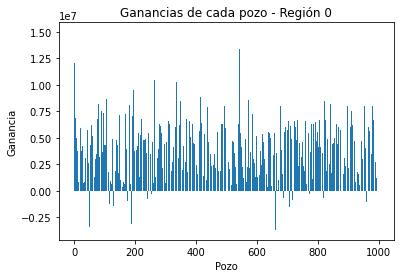

Región 1
Ganancia promedio: 4907373.115252653
Riesgo de pérdida: 0.011
Rango de confianza desde 602181.185877391 hasta 9022825.697601425



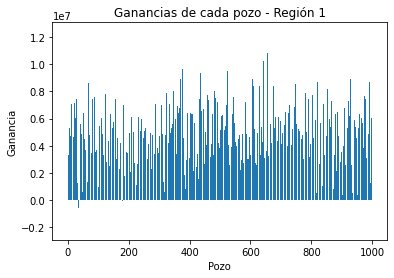

Región 2
Ganancia promedio: 3379517.6657345025
Riesgo de pérdida: 0.123
Rango de confianza desde -2154139.9047276992 hasta 8988732.3884589



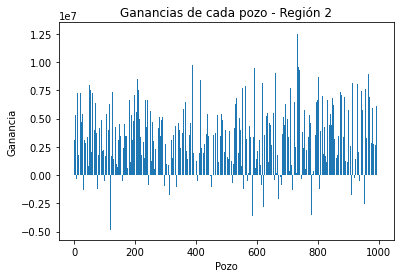

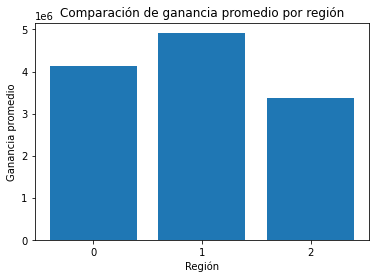

In [19]:
num_bootstrap = 1000
n = 0
mean_profits = []  # Lista para almacenar las ganancias promedio de cada región

for tar, pred in zip(targets, preds):
    profits = []
    for i in range(num_bootstrap):
        # Hacer muestreo con reemplazo por el tamaño de muestra sugerido en el target y con la misma semilla del principio
        target_subsample = pd.Series(tar).sample(n=500, replace=True, random_state=rs)
        # Utilizar el índice de este muestreo para las predicciones
        pred_subsample = pred[target_subsample.index]
        # Calcular el profit con la función de arriba y agregarlo a la lista vacía
        profits.append(revenue(target_subsample, pred_subsample, 200))
    # Transformar la lista de profits en una serie
    profits = pd.Series(profits)
    # Calcular la media
    mean = profits.mean()
    # Obtener intervalos de confianza
    trust_down = profits.quantile(0.025)
    trust_up = profits.quantile(0.975)
    # Calcular la media de los datos negativos de la serie
    loss = (profits < 0).mean()
    
    print('Región', n)
    print('Ganancia promedio:', mean)
    print('Riesgo de pérdida:', loss)
    print('Rango de confianza desde', trust_down, 'hasta', trust_up)
    print()
    
    # Graficar las ganancias de cada pozo
    fig, ax = plt.subplots()
    ax.bar(range(len(profits)), profits)
    ax.set_xlabel('Pozo')
    ax.set_ylabel('Ganancia')
    ax.set_title('Ganancias de cada pozo - Región {}'.format(n))
    plt.show()
    
    mean_profits.append(mean)
    
    n += 1

# Comparación final de ganancia por región
fig, ax = plt.subplots()
regions = np.arange(len(mean_profits))
ax.bar(regions, mean_profits)
ax.set_xlabel('Región')
ax.set_ylabel('Ganancia promedio')
ax.set_title('Comparación de ganancia promedio por región')
ax.set_xticks(regions)
plt.show()



<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelente bucle y gráficas arriba, felicidades    
</div>

## Conclusiones

Después de analizar los datos disponibles y aplicar el modelo de regresión lineal, llegamos a las siguientes conclusiones:

Identificación de variables clave: El modelo de regresión lineal nos permitió identificar las variables (f0, f1, f2) que influyen en la productividad y rentabilidad de los pozos mineros. Estas variables son cruciales para la toma de decisiones estratégicas en la selección de la ubicación del nuevo pozo.

Evaluación del potencial de ganancias: Utilizando el modelo, realizamos predicciones sobre los posibles rendimientos de los pozos en cada región. Observamos que la región 1 tiene el mayor promedio de reservas de petróleo, seguida de la región 2 y la región 0. Esto indica que la región 1 puede ofrecer mayores oportunidades de ganancias para OilyGiant.

Evaluación de los riesgos: Además de las ganancias potenciales, también consideramos los riesgos asociados a cada región. Calculamos el error cuadrático medio (ECM) y el error cuadrático medio raíz (RECM) para evaluar la precisión de nuestras predicciones. Observamos que la región 0 tiene el RECM más bajo, lo que indica una menor variabilidad en las reservas estimadas. Esto sugiere que la región 0 puede presentar menos riesgos en términos de volatilidad en comparación con las otras regiones.

En base a estas conclusiones, recomendamos a OilyGiant considerar la región 1 como la ubicación más adecuada para establecer el nuevo pozo minero. Si bien la región 0 muestra una menor variabilidad y riesgo, la región 1 ofrece un mayor potencial de ganancias debido a su mayor promedio de reservas de petróleo. Sin embargo, es importante tener en cuenta otros factores y realizar un análisis más completo antes de tomar una decisión final.

En general, el uso del modelo de regresión lineal nos proporcionó información valiosa respaldada por datos para la toma de decisiones estratégicas en la selección del mejor lugar para el nuevo pozo minero, permitiendo a OilyGiant optimizar sus operaciones mineras y maximizar sus ganancias.


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correctas conclusiones finales    
</div>